# Mass Shooting Analysis 5: Analysing State Level Mass Shooting Incidents & Demographic/ Relevant Gun Data

In [1]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import math

In [2]:
ms1_sts = pd.read_csv('MSA Data\\us_states_demo_gun_vio_df.csv',index_col=0, encoding='utf-8') # Load pre-prepped data
scope = 'USA, 2014-24'
ms1_sts = ms1_sts.nlargest(20, 'no_ms_inc')

[Text(0, 0.5, 'State'), Text(0.5, 0, 'Mass Shooting Incidents (2014-24)')]

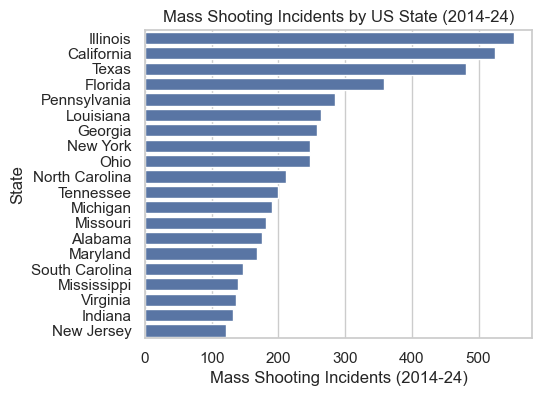

In [3]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(5, 4))

sns.barplot(ms1_sts, y='state_us', x='no_ms_inc').set_title('Mass Shooting Incidents by US State (2014-24)')
ax.set(ylabel='State', xlabel='Mass Shooting Incidents (2014-24)')

In [4]:
ms1_sts['popn_m'] = ms1_sts['population']/1000000

In [5]:
ms1_sts = ms1_sts.rename({ 
          'Suicide rate':'suicide_rate',
          'Gun suicide rate':'gun_suic_rate',
          'Homicide rate':'homicide_rate',
          'Homicide':'homicides',
          'Suicide':'suicide',
          'Gun homicide rate':'gun_homi_rate',
          'Gun deaths':'gun_deaths'
          }, axis ='columns')

In [6]:
labels = {'popn_m':'Population of State (M)',
          'population':'Population (State)',
          'area_sqkm':'Area of the State in Square Kilometers',
          'pop_density':'Population Density (/km^2)',
          'ms_rate': 'Mass Shooting Incidents per 100k (2014-24)',
          'no_ms_inc': 'Number of Mass Shooting Incidents',
          'total_inj':'Total of People Injured in Mass Shooting Incidents',
          'total_kld':'Total of People Killed in Mass Shooting Incidents',
          'total_inj_kill':'Total Injured or Killed in MS Incidents',
          'kpi':'Avg # Killed per MS Incident',
          'wpi':'Avg # Injured per MS Incident',
          'kld_to_wd':'Proportion of Victims Killed in a MS Incident',
          'suicide_rate':'Rate of Suicide per 100k People',
          'gun_suic_rate':'Rate of Suicide with a Gun per 100k People',
          'prop_suic_w_gun':'Prop Suicides Using a Gun (2021, CDC)',
          'homicide_rate':'Rate of Homicide per 100k People',
          'homicides':'Total Number of Homicide (Victims)',
          'gun_homi_rate':'Rate of Homicide with a Gun per 100k People(2021, CDC)',
          'prop_hom_w_gun':'Prop Homicides Using a Gun (2021, CDC)',
          'gun_death_rate':'Rate of Gunshot Deaths per 100k People (2021, CDC)',
          'gun_deaths':'Total Number of Gun Deaths (2021, CDC)',
          'gun_at_home':'Proportion Households in the State w. a Gun'
          }

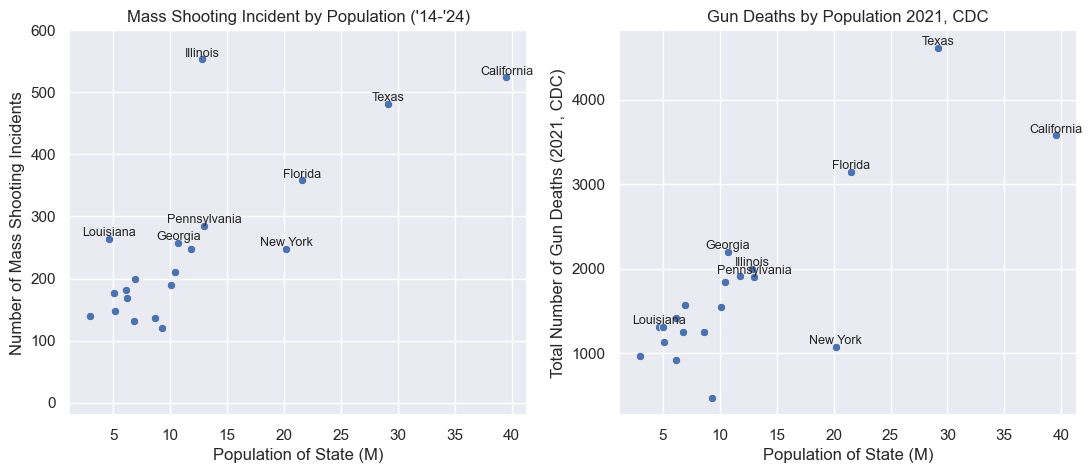

In [7]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

sns.scatterplot(x="popn_m", y="no_ms_inc", data=ms1_sts, ax=ax1).set_title('Mass Shooting Incident by Population (\'14-\'24)')
ax1.set(xlabel=labels["popn_m"], ylabel=labels["no_ms_inc"])
ax1.set_ylim(-20, 600)
sns.scatterplot(x="popn_m", y="gun_deaths", data=ms1_sts, ax=ax2).set_title('Gun Deaths by Population 2021, CDC')
ax2.set(xlabel=labels["popn_m"], ylabel=labels["gun_deaths"])

# Points we want to label (e.g., biggest tips)
highlight = ms1_sts.nlargest(8, "no_ms_inc")

# Annotate them
for _, row in highlight.iterrows():
    ax1.text(row['popn_m'], row['no_ms_inc'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['popn_m'], row['gun_deaths'], row['state_us'], fontsize=9, ha="center", va="bottom")

**Mass Shooting Incidents & Gun Deaths by Population**: There is a clear pattern of higher numbers of mass shooting incidents or gun deaths in general with the population of the state. In terms of MSI, *Illinois* is a clear outlier with almost double the number of incidents than other states with a similar population. It's interesting to note that the chart on the right would suggest that this is not a general gun crime problem in Illinois, which sits in between its similar sized neighbours in terms of overall gun deaths, although this data is from 2021 only, so it would be good to compare the rates over a similar time span. *Louisiana* is also noteworthy as being overrepresented in both mass shootings and gun deaths when compared to similar sized states. *New York* is also noteworthy for having fewer MSIs and gun deaths than would be expected from a state of that population.

## Rate of Mass Shooting Incidents per 100k people
By giving the number as some form of rate per capita we take out the 'artificial' dominance of the bigger states in Mass Shooting Incident totals, to get a better feeling of where mass shootings are really a disproportionate problem. We can see in the table below that if we rank states by the mass shooting rate, Illinois is the only state that occurs towards the top on overall incidents and rate per 100k people.

In [8]:
ms1_sts.nlargest(5, 'ms_rate')

,state_us,population,area_sqkm,pop_density,ms_rate,no_ms_inc,total_inj,total_kld,total_inj_kill,wpi,...,suicide,prop_suic_w_gun,homicide_rate,gun_homi_rate,homicides,prop_hom_w_gun,gun_deaths,gun_death_rate,gun_at_home,popn_m
18,Louisiana,4657757,135659,34.334301,5.667964,264,1097,239,1336,4.155303,...,463,0.671141,20.4,17.4,804,0.852941,1314,28.211004,0.52,4.657757
25,Mississippi,2961279,125438,23.607511,4.693918,139,563,168,731,4.050360,...,333,0.693252,22.2,19.8,583,0.891892,962,32.485963,0.54,2.961279
14,Illinois,12812508,149995,85.419567,4.316095,553,2271,455,2726,4.106691,...,656,0.452174,11.7,10.2,1292,0.871795,1995,15.570722,0.23,12.812508
1,Alabama,5024279,135767,37.006629,3.502990,176,713,210,923,4.051136,...,623,0.756098,14.8,12.9,650,0.871622,1315,26.172910,0.53,5.024279
24,Missouri,6154913,180540,34.091686,2.940740,181,684,209,893,3.779006,...,747,0.633508,11.6,9.9,609,0.853448,1414,22.973517,0.53,6.154913


**Mass Shooting Rate per 100k Population**: *Louisiana* has the highest rate of mass shootings per 100k people, followed by *Mississippi*, *Illinois* and *Alabama*. The big states of *California, Texas* and *Florida* no longer feature in the top few states and are mostly around the median rate. This rate should (hopefully) give us a greater understanding of where mass shootings are a disproportionate problem for a state of any size - not just the big states that have a larger number of MS incidents but a smaller rate per capita. 

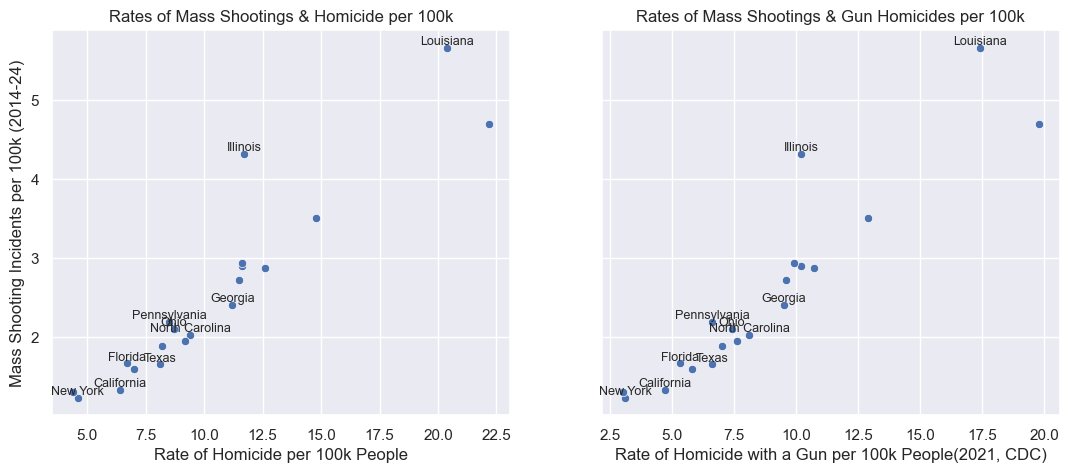

In [18]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(x="homicide_rate", y="ms_rate", data=ms1_sts, ax=ax1).set_title('Rates of Mass Shootings & Homicide per 100k')
ax1.set(xlabel=labels["homicide_rate"], ylabel=labels["ms_rate"])

sns.scatterplot(x="gun_homi_rate", y="ms_rate", data=ms1_sts, ax=ax2).set_title('Rates of Mass Shootings & Gun Homicides per 100k')
ax2.set(xlabel=labels["gun_homi_rate"], ylabel=labels["ms_rate"])

# Points we want to label (e.g., biggest tips)
highlight = ms1_sts.nlargest(10, "no_ms_inc")

# Annotate them
for _, row in highlight.iterrows():
    ax1.text(row['homicide_rate'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['gun_homi_rate'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

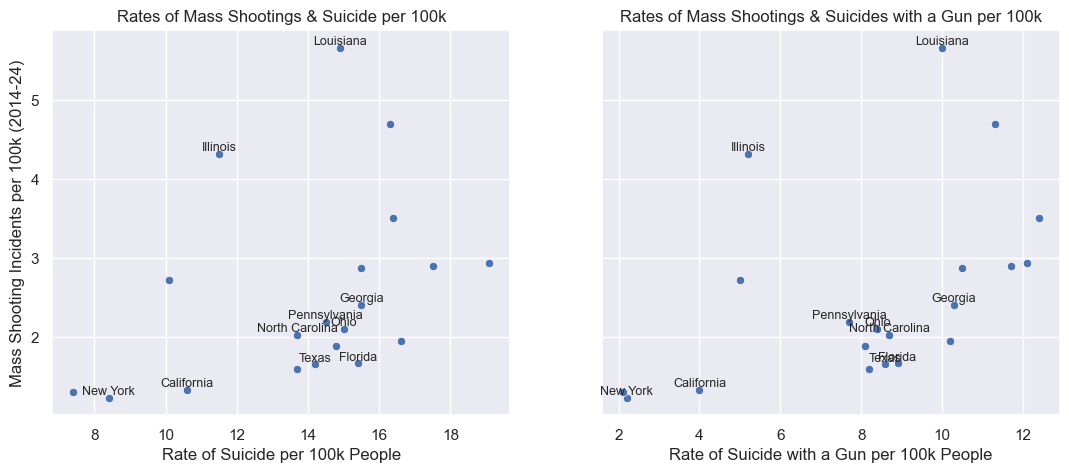

In [19]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(x="suicide_rate", y="ms_rate", data=ms1_sts, ax=ax1).set_title('Rates of Mass Shootings & Suicide per 100k')
ax1.set(xlabel=labels["suicide_rate"], ylabel=labels["ms_rate"])

sns.scatterplot(x="gun_suic_rate", y="ms_rate", data=ms1_sts, ax=ax2).set_title('Rates of Mass Shootings & Suicides with a Gun per 100k')
ax2.set(xlabel=labels["gun_suic_rate"], ylabel=labels["ms_rate"])

# Points we want to label (e.g., biggest tips)
highlight = ms1_sts.nlargest(10, "no_ms_inc")

# Annotate them
for _, row in highlight.iterrows():
    ax1.text(row['suicide_rate'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['gun_suic_rate'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

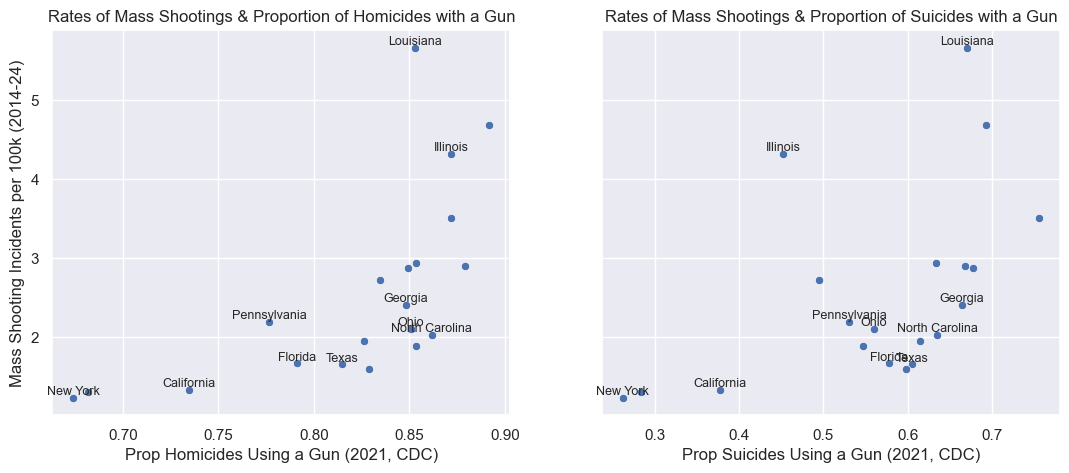

In [20]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(x="prop_hom_w_gun", y="ms_rate", data=ms1_sts, ax=ax1).set_title('Rates of Mass Shootings & Proportion of Homicides with a Gun')
ax1.set(xlabel=labels["prop_hom_w_gun"], ylabel=labels["ms_rate"])

sns.scatterplot(x="prop_suic_w_gun", y="ms_rate", data=ms1_sts, ax=ax2).set_title('Rates of Mass Shootings & Proportion of Suicides with a Gun')
ax2.set(xlabel=labels["prop_suic_w_gun"], ylabel=labels["ms_rate"])

# Points we want to label (e.g., biggest tips)
highlight = ms1_sts.nlargest(10, "no_ms_inc")
# Annotate them
for _, row in highlight.iterrows():
    ax1.text(row['prop_hom_w_gun'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['prop_suic_w_gun'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

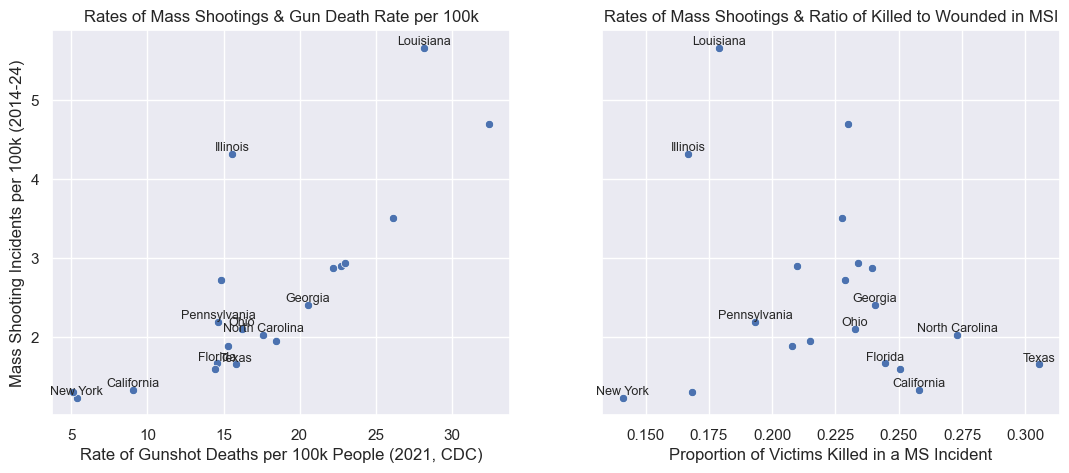

In [21]:
sns.set_theme()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(x="gun_death_rate", y="ms_rate", data=ms1_sts, ax=ax1).set_title('Rates of Mass Shootings & Gun Death Rate per 100k')
ax1.set(xlabel=labels["gun_death_rate"], ylabel=labels["ms_rate"])

sns.scatterplot(x="kld_to_wd", y="ms_rate", data=ms1_sts, ax=ax2).set_title('Rates of Mass Shootings & Ratio of Killed to Wounded in MSI')
ax2.set(xlabel=labels["kld_to_wd"], ylabel=labels["ms_rate"])

# Points we want to label (e.g., biggest tips)
highlight = ms1_sts.nlargest(10, "no_ms_inc")

# Annotate them
for _, row in highlight.iterrows():
    ax1.text(row['gun_death_rate'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['kld_to_wd'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

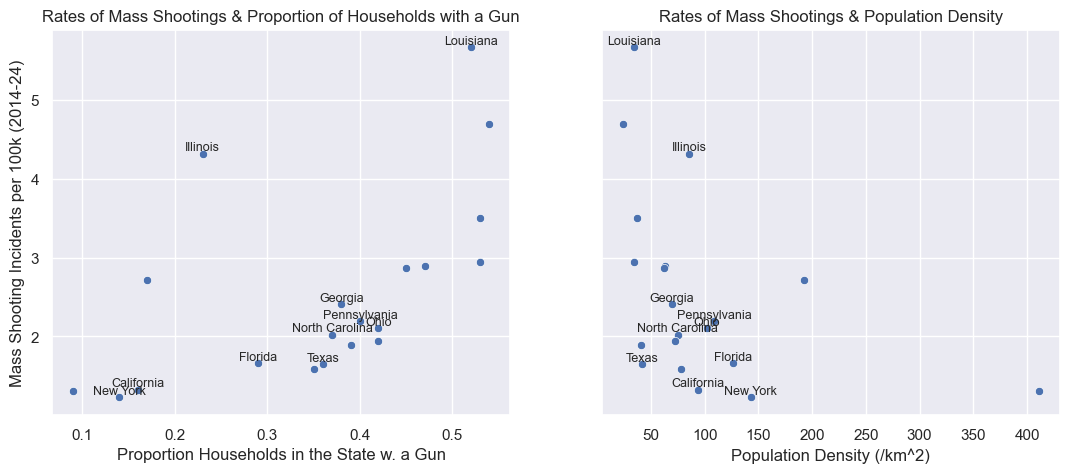

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

sns.scatterplot(x="gun_at_home", y="ms_rate", data=ms1_sts, ax=ax1).set_title('Rates of Mass Shootings & Proportion of Households with a Gun')
ax1.set(xlabel=labels["gun_at_home"], ylabel=labels["ms_rate"])

sns.scatterplot(x="pop_density", y="ms_rate", data=ms1_sts, ax=ax2).set_title('Rates of Mass Shootings & Population Density')
ax2.set(xlabel=labels["pop_density"], ylabel=labels["ms_rate"])

highlight = ms1_sts.nlargest(10, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row['gun_at_home'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['pop_density'], row['ms_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

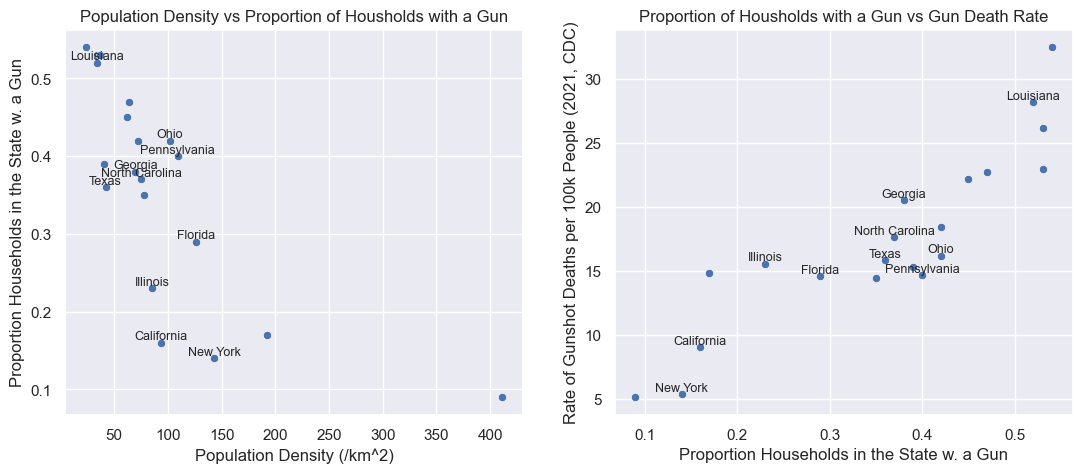

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

sns.scatterplot(x="pop_density", y="gun_at_home", data=ms1_sts, ax=ax1).set_title('Population Density vs Proportion of Housholds with a Gun')
ax1.set(xlabel=labels["pop_density"], ylabel=labels["gun_at_home"])

sns.scatterplot(x="gun_at_home", y="gun_death_rate", data=ms1_sts, ax=ax2).set_title('Proportion of Housholds with a Gun vs Gun Death Rate')
ax2.set(xlabel=labels["gun_at_home"], ylabel=labels["gun_death_rate"])

highlight = ms1_sts.nlargest(10, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row['pop_density'], row['gun_at_home'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['gun_at_home'], row['gun_death_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

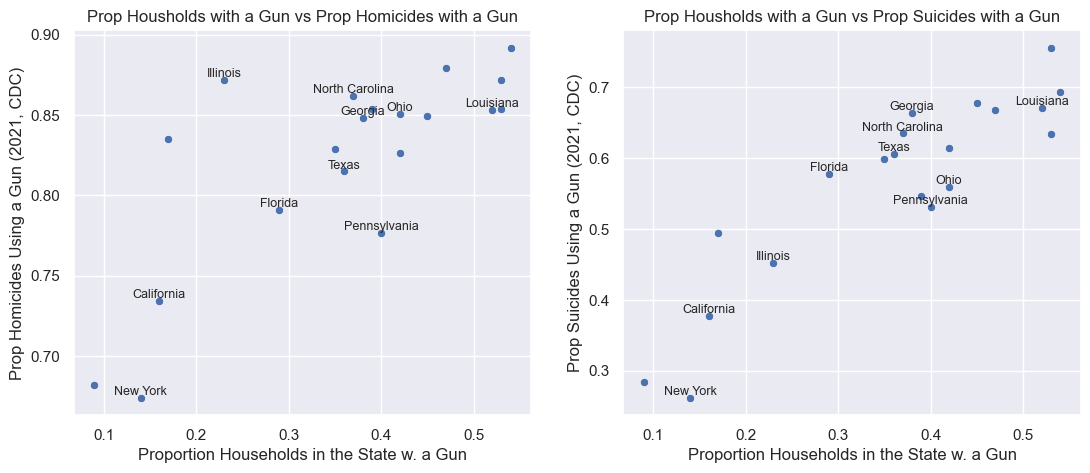

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

sns.scatterplot(x="gun_at_home", y="prop_hom_w_gun", data=ms1_sts, ax=ax1).set_title('Prop Housholds with a Gun vs Prop Homicides with a Gun')
ax1.set(xlabel=labels["gun_at_home"], ylabel=labels["prop_hom_w_gun"])

sns.scatterplot(x="gun_at_home", y="prop_suic_w_gun", data=ms1_sts, ax=ax2).set_title('Prop Housholds with a Gun vs Prop Suicides with a Gun')
ax2.set(xlabel=labels["gun_at_home"], ylabel=labels["prop_suic_w_gun"])

highlight = ms1_sts.nlargest(10, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row['gun_at_home'], row['prop_hom_w_gun'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['gun_at_home'], row['prop_suic_w_gun'], row['state_us'], fontsize=9, ha="center", va="bottom")

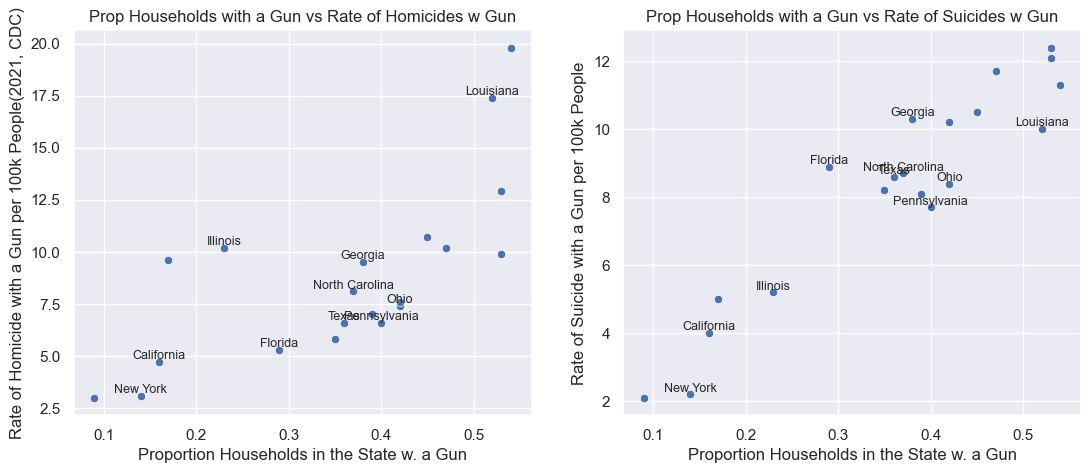

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

sns.scatterplot(x="gun_at_home", y="gun_homi_rate", data=ms1_sts, ax=ax1).set_title('Prop Households with a Gun vs Rate of Homicides w Gun')
ax1.set(xlabel=labels["gun_at_home"], ylabel=labels["gun_homi_rate"])

sns.scatterplot(x="gun_at_home", y="gun_suic_rate", data=ms1_sts, ax=ax2).set_title('Prop Households with a Gun vs Rate of Suicides w Gun')
ax2.set(xlabel=labels["gun_at_home"], ylabel=labels["gun_suic_rate"])

highlight = ms1_sts.nlargest(10, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row['gun_at_home'], row['gun_homi_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['gun_at_home'], row['gun_suic_rate'], row['state_us'], fontsize=9, ha="center", va="bottom")

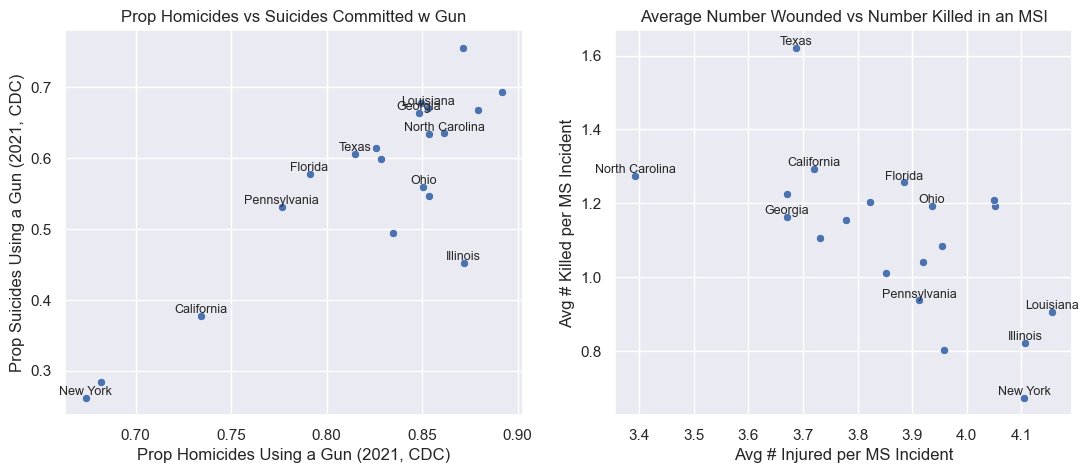

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)

sns.scatterplot(x="prop_hom_w_gun", y="prop_suic_w_gun", data=ms1_sts, ax=ax1).set_title('Prop Homicides vs Suicides Committed w Gun')
ax1.set(xlabel=labels["prop_hom_w_gun"], ylabel=labels["prop_suic_w_gun"])

sns.scatterplot(x="wpi", y="kpi", data=ms1_sts, ax=ax2).set_title('Average Number Wounded vs Number Killed in an MSI')
ax2.set(xlabel=labels["wpi"], ylabel=labels["kpi"])

highlight = ms1_sts.nlargest(10, "no_ms_inc")
for _, row in highlight.iterrows():
    ax1.text(row['prop_hom_w_gun'], row['prop_suic_w_gun'], row['state_us'], fontsize=9, ha="center", va="bottom")
    ax2.text(row['wpi'], row['kpi'], row['state_us'], fontsize=9, ha="center", va="bottom")